# Calculando a Taxa de Retorno da PETR4 com Python
Neste notebook farei o passo a passo para calcular os retornos simples de um ativo da Bolsa brasileira.

## Importando as bibliotecas

In [3]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Importando dados da PETR4

In [13]:
PETR4 = wb.DataReader('PETR4.SA', data_source='yahoo', start='2020-1-1')

In [27]:
type(PETR4)

pandas.core.frame.DataFrame

In [14]:
PETR4.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,30.700001,30.309999,30.510000,30.700001,37774500.0,30.697731
2020-01-03,31.240000,30.450001,30.879999,30.450001,71595600.0,30.447748
2020-01-06,30.940001,29.950001,30.430000,30.809999,81844000.0,30.807720
2020-01-07,30.879999,30.469999,30.820000,30.690001,32822000.0,30.687731
2020-01-08,30.770000,30.240000,30.690001,30.500000,48215600.0,30.497744


## Cálculo do Retorno Simples

$$
\frac{Preço_1 - Preço_0}{Preço_0} = \frac{Preço_1}{Preço_0} - 1
$$

Quando estamos falando desse preço, nos referimos ao PREÇO DE FECHAMENTO AJUSTADO 'Adj Close'

Observação: na primeira linha temos um NaN (Not a Number) pois não temos como calcular o retorno dado que esse é o primeiro dia do conjunto de dados.

In [20]:
# No caso estamos CRIANDO UMA COLUNA para deixar os retornos simples, pos isso o PETR4['Retorno Simples']
# O método .shift que leva para o dia anterior. 
# O número que colocamos como argumento dita o número de dias anteriores


PETR4['Retorno Simples'] = (PETR4['Adj Close'] / PETR4['Adj Close'].shift(1)) - 1
print (PETR4['Retorno Simples'])

Date
2020-01-02         NaN
2020-01-03   -0.008143
2020-01-06    0.011823
2020-01-07   -0.003895
2020-01-08   -0.006191
                ...   
2020-11-09    0.095842
2020-11-10    0.068024
2020-11-11   -0.008666
2020-11-12   -0.042395
2020-11-13    0.031949
Name: Retorno Simples, Length: 217, dtype: float64


## Calculando o Retorno Médio

In [21]:
retorno_medio_ano = PETR4['Retorno Simples'].mean() * 252
retorno_medio_ano

-0.07879216430755108

In [22]:
# Deixando de maneira mais apresentável

print (str(round(retorno_medio_ano, 5) * 100) + ' %')

-7.879 %


## Grático de Análise dos Retornos Simples

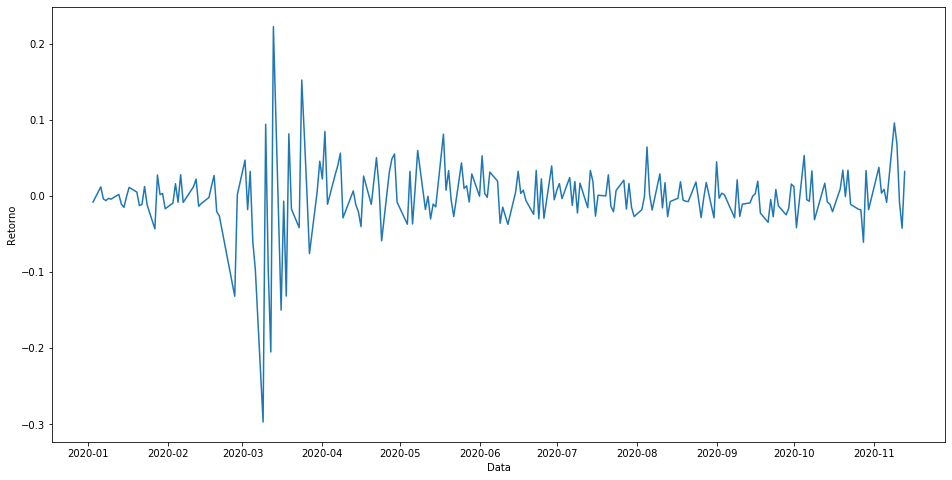

In [26]:
plt.figure(figsize=(16,8))
plt.plot(PETR4['Retorno Simples'])
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.show()